In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

files = os.listdir('.')
files

['plot-GPU-utilization.ipynb',
 'mem_len=16 output_len=1000 batch_size=16.txt',
 'mem_len=32 output_len=1000 batch_size=16.txt',
 'mem_len=64 output_len=1000 batch_size=16.txt',
 'mem_len=128 output_len=1000 batch_size=16.txt',
 'mem_len=256 output_len=1000 batch_size=16.txt']

1390713344 11.49230908203125
1454999552 11.6874619140625
1577262080 14.45163330078125
1822981120 21.77783203125
2315850240 35.822220703125


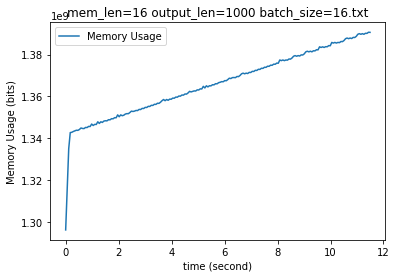

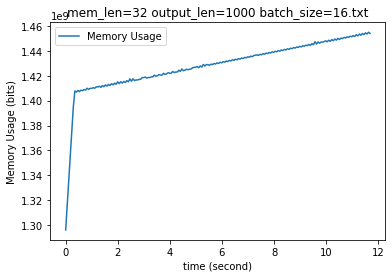

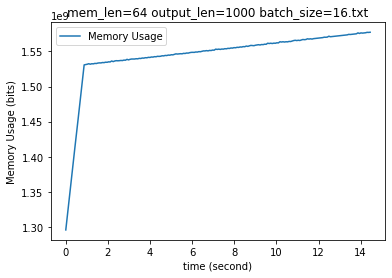

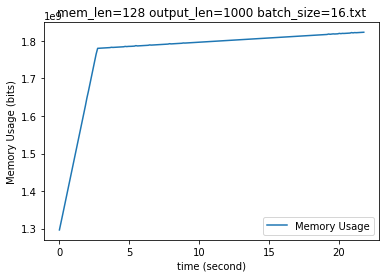

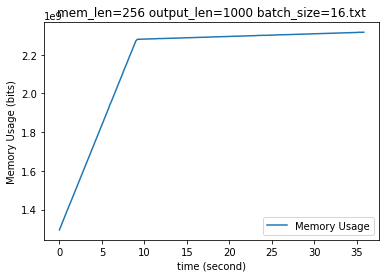

In [2]:
memory_vs_runtime = [[], []]
for fileName in files:
    if fileName[-1] != "t": continue
    file = Path.cwd() / fileName
    with open(file, 'r') as text:
        textfile = text.read()
#     print(textfile)
    runtime = float(textfile.split("\n")[0])
    memory = textfile.split("\n")[1].split(",")
    memory[0] = memory[0][1:]
    memory[-1] = memory[-1][:-1]
    memory = [int(mem) for mem in memory]
    t = np.linspace(start=0, stop=runtime, num=len(memory)).tolist()
    plt.figure()
    plt.plot(t, memory, label='Memory Usage')
    # plt.ylim(0, 100)
    plt.xlabel("time (second)")
    plt.ylabel("Memory Usage (bits)")
    plt.legend()
    plt.title(fileName)
    print(max(memory), runtime)
    memory_vs_runtime[0].append(max(memory))
    memory_vs_runtime[1].append(runtime)

In [3]:
memory_vs_runtime

[[1390713344, 1454999552, 1577262080, 1822981120, 2315850240],
 [11.49230908203125,
  11.6874619140625,
  14.45163330078125,
  21.77783203125,
  35.822220703125]]

Text(0.5, 1.0, 'Runtime vs Memory Tradeoff')

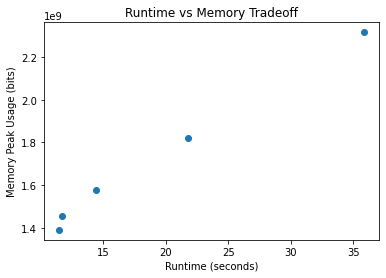

In [4]:
plt.scatter(memory_vs_runtime[1], memory_vs_runtime[0])
plt.xlabel("Runtime (seconds)")
plt.ylabel("Memory Peak Usage (bits)")
plt.title("Runtime vs Memory Tradeoff")